# Problem Set 4

In [87]:
import numpy as np
from matplotlib import pyplot as plt

## a) 

Loading the data

In [88]:
st=np.load('sidebands.npz')

In [89]:
t=st['time']
d=st['signal']

In [90]:
st.close()

Plot of the data:

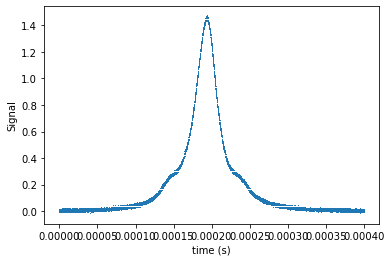

In [91]:
plt.plot(t,d,',')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.show()

I defined the routine lorentz to receive the $t$, $a$, $t0$, and $w$. It returns a Lorentzian of the form: $y(t)=\frac{a}{1+(t-t_{0})^{2}/w^{2}}$ and the analytical derivatives:
$$\frac{\partial y}{\partial a}(t)=\frac{1}{1+(t-t_{0})^{2}/w^{2}}$$
$$\frac{\partial y}{\partial t_{0}}(t)=\frac{2a(t-t_{0})w^{2}}{(t^{2}-2tt_{0}+t_{0}^{2}+w^{2})^{2}}$$
$$\frac{\partial y}{\partial w}(t)=\frac{2aw(t-t_{0})^{2}}{(t^{2}-2tt_{0}+t_{0}^{2}+w^{2})^{2}}$$

In [92]:
def lorentz(t,a,t0,w):
    y=a/(1+(((t-t0)**2)/(w**2)))
    dyda=1/(1+((t-t0)**2/w**2))
    dydt0=2*a*(t-t0)*(w**2)/((t**2-2*t*t0+t0**2+w**2)**2)
    dydw=2*a*w*((t-t0)**2)/((t**2-2*t*t0+t0**2+w**2)**2)
    return y,dyda,dydt0,dydw

I defined an initial guess p0 for $a$, $t_{0}$, and $w$

In [93]:
p0=np.array([1.7,0.0002,0.00004])
y0,d1,d2,d3=lorentz(t,p0[0],p0[1],p0[2])

A plot including the signal and the (not very well) initial guess.

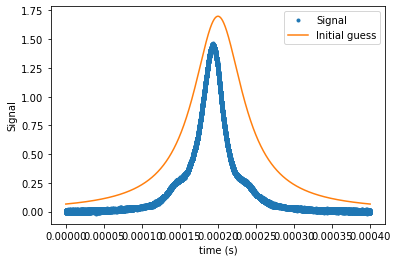

In [94]:
plt.plot(t,d,'.',label='Signal')
plt.plot(t,y0,label='Initial guess')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

Then, I used the Newton's method to find a root of $\nabla\chi^{2}$ for the set of parameters $m$. Then, the iterative method can be applied using a Taylor expansion for $A(m)=A(m_{0})+A'(m_{0})\delta{m}$, and considering the residual $r=d-A(m_{0})$, the new definition for $\chi^{2}=(r-A'(m_{0}))^{T}N^{-1}(r-A'(m_{0}))$. And asuming that $\delta{m}$ is very small we want to solve $\nabla{\chi^{2}}=-A'^{T}(m_{0})N^{-1}(r-A'(m_{0})\delta{m})=0$. Thus, $\delta{m}=(A'^{T}(m_{0})N^{-1}A'(m_{0}))^{-1}A'^{T}(m_{0})N^{-1}r$, and the iteration for finding a root of $\nabla{\chi^{2}}$ is $m_{n+1}=m_{n}+\delta{m}$.

I wrote a code to take 15 times the routine lorentz and iterates from the initial guess and taking a step of $\delta{m}$ as estimated above. This 15 steps is more than enough to note that the routine have converged and the square sum of the residuals does not change.

[1.14495075e+00 1.92443027e-04 2.69045586e-05] 13280.716666499455
[1.35541623e+00 1.92006627e-04 1.67272760e-05] 603.3783086242756
[1.42225419e+00 1.92412485e-04 1.79499148e-05] 172.2854965394035
[1.42287758e+00 1.92356341e-04 1.79218862e-05] 63.749345617650995
[1.42280872e+00 1.92358766e-04 1.79237399e-05] 63.67282367642887
[1.42281087e+00 1.92358645e-04 1.79236861e-05] 63.67266265249974
[1.42281068e+00 1.92358650e-04 1.79236908e-05] 63.672662307924874
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717502
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717335
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717334
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.672662307173326
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717332
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717333
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.67266230717334
[1.42281068e+00 1.92358649e-04 1.79236908e-05] 63.672662307173326


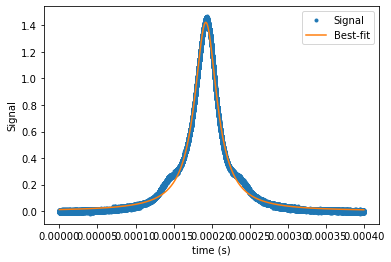

In [95]:
p=p0.copy()
for j in range(15):
    y,d1,d2,d3=lorentz(t,p[0],p[1],p[2])
    r=d-y
    err=(r**2).sum()
    A_m=np.zeros([r.size,3])
    A_m[:,0]=d1
    A_m[:,1]=d2
    A_m[:,2]=d3

    lhs=A_m.T@A_m
    rhs=A_m.T@r
    dp=np.linalg.pinv(lhs)@(rhs)
    for i in range(p.size):
        p[i]=p[i]+dp[i]
    print(p,err)
plt.plot(t,d,'.',label='Signal')
plt.plot(t,y,label='Best-fit')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

The best parameters estimation for this first case was: $a=1.42281068$, $t_{0}=1.92358649\times10^{-4}$, and $w=1.79236908\times10^{-5}$

# b)

An estimation for the errors of the data could be the standard deviation of a portion of the data where it must be constant, i.e, at the end or the begining because the Lorentzian must decrease to 0  very far to the center of the distribution. Then, I defined the inverse of the noise matrix as $N_{ij}^{-1}=\delta_{ij}(1/\sigma^{2})$, and the error on the data should be $\sigma$, which is the standard deviation of the last 2000 data points.

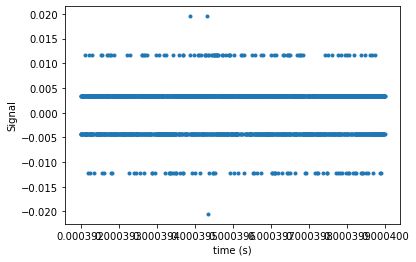

In [96]:
plt.plot(t[-2000::],d[-2000::],'.',label='Signal')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.show()

In [97]:
s=np.std(d[-2000::])

In [98]:
Ninv=1/(s**2)

In [99]:
s

0.005079027676682116

The error in the data was $\sigma=0.005$. Since $\delta{m}$ is very small at the end of the iteration, but the estimation in $\delta{m}$ should have an error that could be considered the error of the paramters estimated since $m_{n+1}=m_{n}+\delta{m}$ is th iteration for the Newton's method. The squared error in the parameters estimation would be the diagonal of $(A'(m)N^{-1}A'(m))^{-1}$

In [100]:
np.sqrt(np.diag(np.linalg.pinv(A_m.T@(Ninv*(A_m)))))

array([8.56411029e-05, 1.07853637e-09, 1.52734435e-09])

The errors were $\sigma_{a}=8.56411029\times10^{-5}$, $\sigma_{t_{0}}=1.07853637\times10^{-9}$, $\sigma_{w}=1.52734435\times10^{-9}$.

# c)

Now, I defined the routine deriv3 to compute the numerical partial derivatives for a given small $h$ as follows:
$\frac{\partial y}{\partial m_{i}}=\frac{y(t,m1,...m_{i}+h,...,m_{n})-y(t,m1,...m_{i}-h,...,m_{n})}{2h}$. I also defined the routine lorentzz just to evaluate a Lorentzian using a set of parameters. Then I followed the same procedure as before to estimate the best-fit parameters but using the numerical derivatives with an h=0.00001

In [101]:
def deriv3(fun,param,t,h):
    y=fun(t,param[0],param[1],param[2])
    d1=(fun(t,param[0]+h,param[1],param[2])-fun(t,param[0]-h,param[1],param[2]))/(2*h)
    d2=(fun(t,param[0],param[1]+h,param[2])-fun(t,param[0],param[1]-h,param[2]))/(2*h)
    d3=(fun(t,param[0],param[1],param[2]+h)-fun(t,param[0],param[1],param[2]-h))/(2*h)
    return y,d1,d2,d3

In [102]:
def lorentzz(t,a,t0,w):
    y=a/(1+(((t-t0)**2)/(w**2)))
    return y

[1.15576490e+00 1.92404255e-04 2.66065883e-05] 13280.716666499455
[1.37877326e+00 1.91940018e-04 1.62863813e-05] 575.1348950106855
[1.40476107e+00 1.92347247e-04 1.81254201e-05] 180.06758668978912
[1.42490302e+00 1.92230535e-04 1.78857091e-05] 64.81909899796698
[1.42319146e+00 1.92255158e-04 1.79113721e-05] 64.07145455406325
[1.42344948e+00 1.92250982e-04 1.79076009e-05] 63.92000186583158
[1.42340960e+00 1.92251681e-04 1.79082082e-05] 63.94183489479564
[1.42341616e+00 1.92251564e-04 1.79081076e-05] 63.93810010023684
[1.42341507e+00 1.92251584e-04 1.79081243e-05] 63.93871857583188
[1.42341525e+00 1.92251581e-04 1.79081216e-05] 63.93861570456267
[1.42341522e+00 1.92251581e-04 1.79081220e-05] 63.938632800412876
[1.42341523e+00 1.92251581e-04 1.79081219e-05] 63.93862995896652
[1.42341522e+00 1.92251581e-04 1.79081220e-05] 63.93863043122282
[1.42341522e+00 1.92251581e-04 1.79081220e-05] 63.93863035273225
[1.42341522e+00 1.92251581e-04 1.79081220e-05] 63.938630365777584


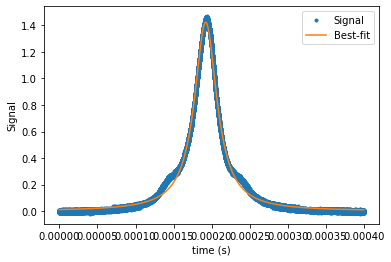

In [103]:
p=p0.copy()
for j in range(15):
    y,d1,d2,d3=deriv3(lorentzz,p,t,0.00001)
    r=d-y
    err=(r**2).sum()
   # r=np.matrix(r).transpose()
    A_m=np.zeros([r.size,3])#np.matrix((d1,d2,d3))
    A_m[:,0]=d1
    A_m[:,1]=d2
    A_m[:,2]=d3
    #print(A_m)

    lhs=A_m.T@A_m
    rhs=A_m.T@r
    dp=np.linalg.pinv(lhs)@(rhs)
    for i in range(p.size):
        p[i]=p[i]+dp[i]
    print(p,err)
plt.plot(t,d,'.',label='Signal')
plt.plot(t,y,label='Best-fit')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

The best parameters for this case were $a=1.42341522$, $t_{0}=1.92251581\times{10^{-4}}$, and $w=1.79081220\times{10^{-5}}$, which compared to the first case the differences in the parameters are $\Delta{a}=6\times{10^{-4}}$, $\Delta{t_{0}}=10^{-7}$, and $\Delta{w}=10^{-8}$, which is about one order of magnitude higher than the errors estimated before. Then, I compared the reiduals for the models with the data to see if there are very large differences. 

In [104]:
1.42341522-1.42281068,1.92251581e-4-1.92358649e-4,1.79081220e-5-1.79236908e-5

(0.0006045400000000978, -1.0706800000000356e-07, -1.5568800000002344e-08)

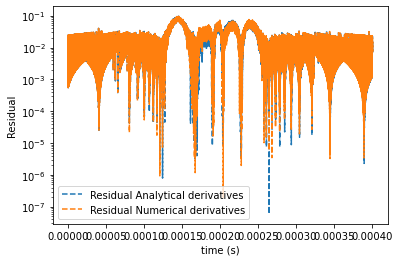

In [105]:
plt.plot(t,np.abs(d-lorentzz(t,1.42281068,1.92358649e-4,1.79236908e-5)),'--',label='Residual Analytical derivatives')
plt.plot(t,np.abs(d-lorentzz(t,1.42341522,1.92251581e-4,1.79081220e-5)),'--',label='Residual Numerical derivatives')
plt.yscale('log')
plt.ylabel('Residual')
plt.xlabel('time (s)')
plt.legend()
plt.show()

We can note that the residuals are almost the same, then using the analytical or numerical derivatives give almost the same results.

# d)

I defined the routine deriv6 to obtain the partial derivatives for a function with 6 parameters to fit, and the routine triple_lorentzz as a function:
$$y(t)=\frac{a}{1+(t-t_{0})^{2}/w^{2}}+\frac{b}{1+(t-t_{0}+dt)^{2}/w^{2}}+\frac{c}{1+(t-t_{0}-dt)^{2}/w^{2}}$$

In [106]:
def deriv6(fun,p,t,h):
    y=fun(t,p[0],p[1],p[2],p[3],p[4],p[5])
    d1=(fun(t,p[0]+h,p[1],p[2],p[3],p[4],p[5])-fun(t,p[0]-h,p[1],p[2],p[3],p[4],p[5]))/(2*h)
    d2=(fun(t,p[0],p[1]+h,p[2],p[3],p[4],p[5])-fun(t,p[0],p[1]-h,p[2],p[3],p[4],p[5]))/(2*h)
    d3=(fun(t,p[0],p[1],p[2]+h,p[3],p[4],p[5])-fun(t,p[0],p[1],p[2]-h,p[3],p[4],p[5]))/(2*h)
    d4=(fun(t,p[0],p[1],p[2],p[3]+h,p[4],p[5])-fun(t,p[0],p[1],p[2],p[3]-h,p[4],p[5]))/(2*h)
    d5=(fun(t,p[0],p[1],p[2],p[3],p[4]+h,p[5])-fun(t,p[0],p[1],p[2],p[3],p[4]-h,p[5]))/(2*h)
    d6=(fun(t,p[0],p[1],p[2],p[3],p[4],p[5]+h)-fun(t,p[0],p[1],p[2],p[3],p[4],p[5]-h))/(2*h)
    return y,d1,d2,d3,d4,d5,d6

In [107]:
def triple_lorentzz(t,a,t0,w,b,c,dt):
    y=a/(1+(((t-t0)**2)/(w**2)))+b/(1+(((t-t0+dt)**2)/(w**2)))+c/(1+(((t-t0-dt)**2)/(w**2)))
    return y

I tried to apply the Newton's method to obtain the best $a$, $t_{0}$, $w$, $b$, $c$,and $dt$. 

In [108]:
p00=np.array([1.5,0.0002,0.00002,0.09,0.09,0.00005])
y00=triple_lorentzz(t,p00[0],p00[1],p00[2],p00[3],p00[4],p00[5])

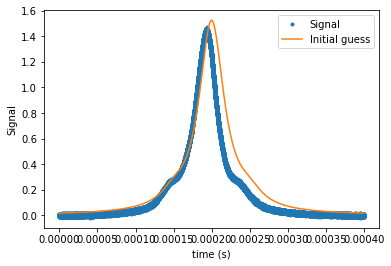

In [109]:
plt.plot(t,d,'.',label='Signal')
plt.plot(t,y00,label='Initial guess')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

[1.25047080e+00 1.91329062e-04 1.99579058e-05 1.43109655e-02
 5.98154221e-02 4.26743304e-05] 1885.0857570343833
[1.44849038e+00 1.93287533e-04 1.53718507e-05 1.06497232e-01
 4.34732571e-02 5.48051816e-05] 179.9493486118001
[1.42674988e+00 1.92389598e-04 1.63981877e-05 8.52008563e-02
 5.61642455e-02 4.12597695e-05] 82.4347860628996
[1.44410593e+00 1.92498150e-04 1.62051351e-05 9.69182734e-02
 5.81243603e-02 4.61791867e-05] 25.831400039601085
[1.44256141e+00 1.92468212e-04 1.60363359e-05 1.02202510e-01
 6.74517308e-02 4.29515827e-05] 21.921147558726908
[1.44047235e+00 1.92484066e-04 1.61391842e-05 1.00740322e-01
 6.37032091e-02 4.45312680e-05] 22.054678864950006
[1.44185569e+00 1.92474160e-04 1.60716110e-05 1.02113533e-01
 6.62873906e-02 4.38446431e-05] 21.47531523124391
[1.44100823e+00 1.92479228e-04 1.61008377e-05 1.01693802e-01
 6.53352312e-02 4.41582963e-05] 21.602365460998314
[1.44139320e+00 1.92476766e-04 1.60869523e-05 1.01916131e-01
 6.58103802e-02 4.40213619e-05] 21.514177616676

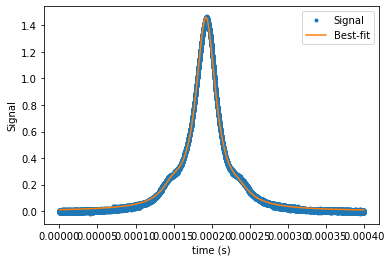

In [112]:
p=p00.copy()
for j in range(20):
    y,d1,d2,d3,d4,d5,d6=deriv6(triple_lorentzz,p,t,0.00001)
    r=d-y
    err=(r**2).sum()
    A_m=np.zeros([r.size,6])
    A_m[:,0]=d1
    A_m[:,1]=d2
    A_m[:,2]=d3
    A_m[:,3]=d4
    A_m[:,4]=d5
    A_m[:,5]=d6

    lhs=A_m.T@(Ninv*A_m)
    rhs=A_m.T@(Ninv*r)
    dp=np.linalg.pinv(lhs)@(rhs)
    for i in range(p.size):
        p[i]=p[i]+dp[i]
    print(p,err)
plt.plot(t,d,'.',label='Signal')
plt.plot(t,y,label='Best-fit')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

In [113]:
p

array([1.44126858e+00, 1.92477545e-04, 1.60911601e-05, 1.01854764e-01,
       6.56723976e-02, 4.40636870e-05])

The best parameters were $a=1.44126858$, $t_{0}=1.92477545\times10^{-4}$, $w=1.60911601\times10^{-5}$, $b=0.101854764$, $c=0.0656723976$, and $dt=4.40636870\times10^{-5}$

In [114]:
np.sqrt(np.diag(np.linalg.pinv(A_m.T@(Ninv*(A_m)))))

array([1.06935600e-04, 1.36475658e-09, 2.21404009e-09, 9.08337735e-05,
       8.81219303e-05, 1.61272769e-08])

In [115]:
s

0.005079027676682116

The errors of the parameters estimations are $\sigma_{a}=1.06935600\times10^{-4}$, $\sigma_{t_{0}}=1.36475658\times10^{-9}$, $\sigma_{w}=2.21404009\times10^{-9}$, $\sigma_{b}=9.08337735\times10^{-5}$, $\sigma_{c}=8.81219303\times10^{-5}$, $\sigma_{dt}=1.61272769\times10^{-8}$

# e)

We can compare the residuals of the model obtained with the triple Lorentzian with the error estimated for the data. 

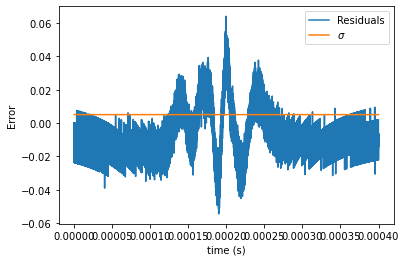

In [116]:
plt.plot(t,(d-y),label='Residuals')
plt.plot(t,[s]*len(t),label='$\sigma$')
plt.xlabel('time (s)')
plt.ylabel('Error')
plt.legend()
plt.show()

We can note that the error is not fully representative for all the residuals, but is still representative for the majority.

# f)

We can use the matrix $N_{m}=(A'N^{-1}A')^{-1}$ to generate some realizations of the noise. Using the Cholesky decomposition we can find that $N_{m}=LL^{T}$. Since, $N_{m}$ is a correlation matrix error for the parameters, we can use the Cholesky decomposition to generate some correlated parameters from some random distributed parameters $m_{corr}=Lm_{uncorr}$. Then, some realizations of the noise for the parameters $m$ could be computed using $<m_{corr}m_{corr}^{T}>$.

In [138]:
np.linalg.pinv(A_m.T@(Ninv*(A_m)))

array([[ 1.14352226e-08, -1.33215398e-15, -1.60064433e-13,
         1.99433179e-09,  1.88741370e-09,  7.24932753e-14],
       [-1.33215398e-15,  1.86256051e-18, -7.11175103e-20,
         3.49828974e-14, -2.99741904e-14, -1.53003608e-18],
       [-1.60064433e-13, -7.11175103e-20,  4.90197350e-18,
        -1.20268922e-13, -1.11669814e-13,  1.24061021e-17],
       [ 1.99433179e-09,  3.49828974e-14, -1.20268922e-13,
         8.25077440e-09,  2.24340268e-09, -4.46480765e-13],
       [ 1.88741370e-09, -2.99741904e-14, -1.11669814e-13,
         2.24340268e-09,  7.76547459e-09, -3.55338862e-13],
       [ 7.24932753e-14, -1.53003608e-18,  1.24061021e-17,
        -4.46480765e-13, -3.55338862e-13,  2.60089061e-16]])

In [139]:
Nm=np.linalg.pinv(A_m.T@(Ninv*(A_m)))

In [140]:
mm=[]
for i in range(100):
    mm.append(np.linalg.cholesky(Nm)@np.random.randn(6))    

In [141]:
NN=[] #Realizations of the Noise.
for i in mm:
    NN.append(np.transpose([i])@[i])

We can note that if we do the mean of the realizations, it is very similar to $N_{m}$

In [142]:
sum(NN)/len(NN)

array([[ 1.27196609e-08,  2.73477420e-14, -1.79125699e-13,
         2.89188029e-09,  1.52549039e-09,  6.21234306e-14],
       [ 2.73477420e-14,  1.74161113e-18, -5.42963440e-19,
         4.99910827e-14, -2.06551188e-14, -2.88470182e-18],
       [-1.79125699e-13, -5.42963440e-19,  5.24334360e-18,
        -1.32431944e-13, -1.11267564e-13,  1.48748206e-17],
       [ 2.89188029e-09,  4.99910827e-14, -1.32431944e-13,
         8.09719394e-09,  2.63837291e-09, -6.57331197e-13],
       [ 1.52549039e-09, -2.06551188e-14, -1.11267564e-13,
         2.63837291e-09,  7.24941709e-09, -4.15896283e-13],
       [ 6.21234306e-14, -2.88470182e-18,  1.48748206e-17,
        -6.57331197e-13, -4.15896283e-13,  2.77486878e-16]])

If we consider the diagonal of the matrix for every realization and use the parameters that we obtained and do a model considering new parameters $m_{new_{i}}=m_{old}\pm\sigma_{m_{i}}$. I did a plot using this shifted parameters with the data, and I noticed that the differences with the best-fit is not too high.

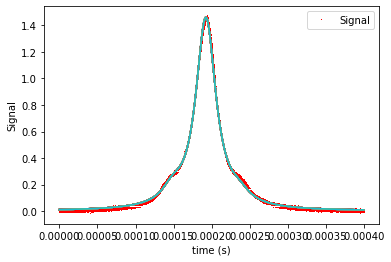

In [143]:
plt.plot(t,d,',',label='Signal', color='red')
for i in range(20):
    s=np.sqrt(np.diag(NN[i]))
    plt.plot(t,triple_lorentzz(t,p[0]+s[0],p[1]+s[1],p[2]+s[2],p[3]+s[3],p[4]+s[4],p[5]+s[5]))
    plt.plot(t,triple_lorentzz(t,p[0]-s[0],p[1]-s[1],p[2]-s[2],p[3]-s[3],p[4]-s[4],p[5]-s[5]))
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

As a sanity (because I am not very sure if applied well the realization with Cholesky) check I used np.random.multivariate_normal with the best fit paramaters and $N_{m}$ to generate some parameters shifted proportionally to the noise matrix.

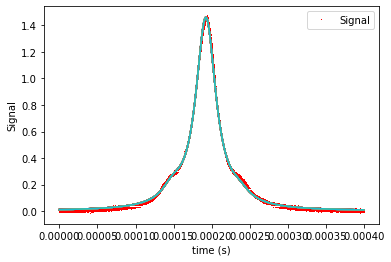

In [144]:
plt.plot(t,d,',',label='Signal', color='red')
for i in range(40):
    s=np.random.multivariate_normal(p,Nm)
    plt.plot(t,triple_lorentzz(t,s[0],s[1],s[2],s[3],s[4],s[5]))
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

We can note that there are not a lot of variability between the two methods. Now, I defined the $\chi^{2}$ for every shifted data as $\chi^{2}=(d-A(m))^{T}(d-A(m))$ and the difference $\Delta{\chi^{2}}=\chi^{2}-\chi_{fit}^{2}$ with $\chi_{fit}^{2}=(d-A(m_{best}))^{T}(d-A(m_{best}))$. I tried this with the two methods, cholesky and np.multivariate_normal.

In [145]:
chi2=[]
for i in range(len(NN)):
    s=np.sqrt(np.diag(NN[i]))
    x=(d-triple_lorentzz(t,p[0]+s[0],p[1]+s[1],p[2]+s[2],p[3]+s[3],p[4]+s[4],p[5]+s[5]))
    x2=x@x
    chi2.append(x2)
for i in range(len(NN)):
    s=np.sqrt(np.diag(NN[i]))
    x=(d-triple_lorentzz(t,p[0]-s[0],p[1]-s[1],p[2]-s[2],p[3]-s[3],p[4]-s[4],p[5]-s[5]))
    x2=x@x
    chi2.append(x2)

In [146]:
(d-y)@(d-y) #chi^2 with the best parameters

21.53610266943753

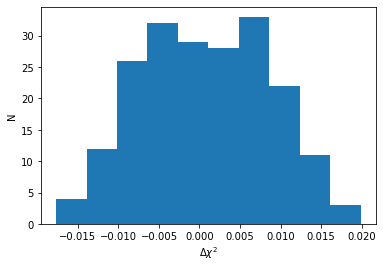

In [147]:
plt.hist(np.array(chi2)-(d-y)@(d-y))
plt.ylabel('N')
plt.xlabel('$\Delta{\chi^{2}}$')
plt.show()

In [148]:
chi22=[]
for i in range(2*len(NN)):
    s=np.random.multivariate_normal(p,Nm)
    x=(d-triple_lorentzz(t,s[0],s[1],s[2],s[3],s[4],s[5]))
    x2=x@x
    chi22.append(x2)

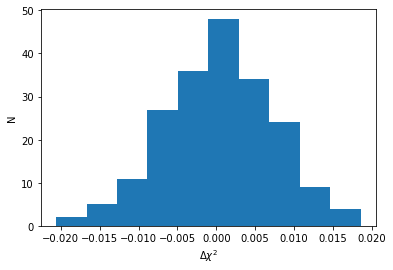

In [149]:
plt.hist(np.array(chi22)-(d-y)@(d-y))
plt.ylabel('N')
plt.xlabel('$\Delta{\chi^{2}}$')
plt.show()

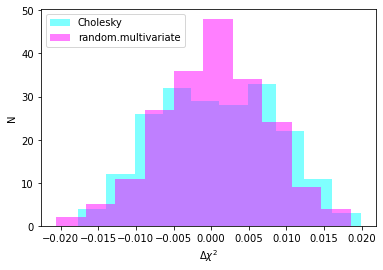

In [150]:
plt.hist(np.array(chi2)-(d-y)@(d-y),color='cyan',label='Cholesky',alpha=0.5)
plt.hist(np.array(chi22)-(d-y)@(d-y),color='magenta',label='random.multivariate',alpha=0.5)
plt.ylabel('N')
plt.xlabel('$\Delta{\chi^{2}}$')
plt.legend()
plt.show()

In [151]:
np.mean(chi2-(d-y)@(d-y)),np.mean(chi22-(d-y)@(d-y))

(0.0006941979641872464, 0.00038664925528175687)

In [152]:
np.std(chi2-(d-y)@(d-y)),np.std(chi22-(d-y)@(d-y))

(0.00787839601227453, 0.006938725143589806)

We can note that the difference between the two distributions of $\Delta{\chi^{2}}$ are very similar and the mean difference is about 0 with a standard deviation of about 0.007. We can see that both distributions are mainly between -0.02 and 0.02, this makes sense because the estimation of the error in the data and the residuals previously computed are in the same range. For running the MCMC I used np.random.multivariate_normal using a mean 0 and the input covariance matrix $N_{m}$ for shifting the parameters as the chain steps.

# g)

I defined the routine chi2 to calculate the $\chi^{2}$ and the noise routine to calculate the shift of parameters. I also defined the run_mcmc routine to run the MCMC, which is a modified version of which we saw in class.

In [153]:
def chi2(theta,t,d):
        a,t0,w,b,c,dt = theta
        yy=triple_lorentzz(t,a,t0,w,b,c,dt)      
        return ((d-yy)@(d-yy))

In [154]:
def noise(Nm):
    
    return(np.random.multivariate_normal([0]*len(Nm),Nm))

#Below an alternative way using Cholesky
#def noise(Nm):    
 #   mm=(np.linalg.cholesky(Nm)@np.random.randn(6))
    
  #  return np.sqrt(np.diag(np.transpose([mm])@[mm]))*np.random.choice([-1,1])

The run_mcmc routine receivse the time array for the fit, the data for computing the $\chi^{2}$, a starting guess of the parameters, the number of steps a scale to multiply the shift returned by the noise routine.

The routine computes the $\chi^{2}$ for the starting guess, then shifts the parameters using the noise routine and computes the $\chi^{2}$ for the new set of parameters, if this is lower than the previous $\chi^{2}$ the list of parameters is included in the list of output parameters for the posterior distribution. If the $\chi^{2}$ is greater than the old value it computes a probability $e^{-0.5\Delta{\chi^{2}}}$ (with $\Delta{\chi^{2}}=\Delta{\chi_{n}^{2}}-\Delta{\chi_{n-1}^{2}}$) and accepts the parameters just if the probability is greater than a random value. It iterates and compares with the previous accepted step for nsteps and finally returns the parameters accepted along with the $\chi^{2}$ for every case. After some trials I run the MCCM for 100000 steps and scale of 10.

In [155]:
def run_mcmc(t,data,start_pos,nstep,scale=None):
    nparam=start_pos.size
    params=np.zeros([nstep,nparam+1])
    params[0,0:-1]=start_pos
    cur_chisq=chi2(start_pos,t,data)
    cur_pos=start_pos.copy()
    if scale[0]==None:
        scale=np.ones(nparam)
    for i in range(1,nstep):
        new_pos=cur_pos+noise(Nm)*scale
        new_chisq=chi2(new_pos,t,data)
        if new_chisq<cur_chisq:
            accept=True
        else:
            delt=new_chisq-cur_chisq
            prob=np.exp(-0.5*delt)
            if np.random.rand()<prob:
            #if 0.001<prob:
                accept=True
            else:
                accept=False
        if accept:
            cur_pos=new_pos
            cur_chisq=new_chisq
        params[i,0:-1]=cur_pos
        params[-1]=cur_chisq
    return params

In [156]:
chain=run_mcmc(t,d,p,100000,np.array([10]))

We can note that the chain converged because the parameters forget their initial values as shown in the figure below. 

Text(0.5, 0, 'step')

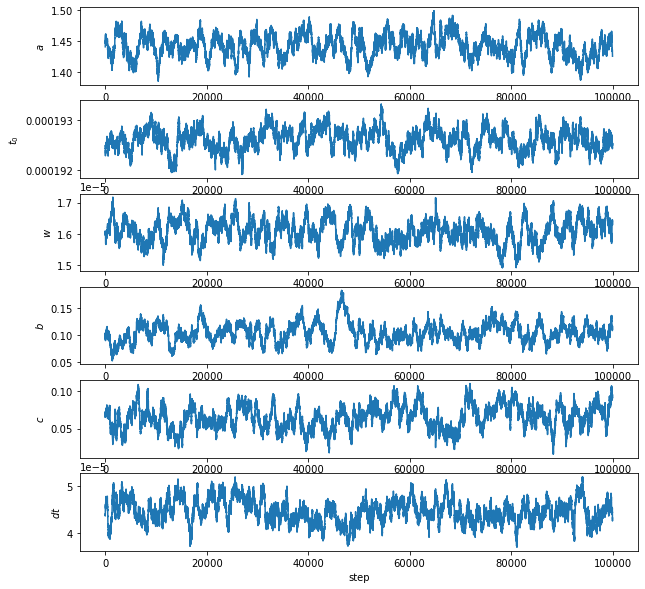

In [157]:
f,ax=plt.subplots(6,1,figsize=(10,10))
par=['$a$','$t_{0}$','$w$','$b$','$c$','$dt$']
for i in range(6):
    ax[i].plot([chain[j][i] for j in range(0,len(chain)-1)])
    ax[i].set_ylabel(par[i])
plt.xlabel('step')

In [158]:
ad=np.array([chain[j][0] for j in range(0,len(chain)-1)])
t0d=np.array([chain[j][1] for j in range(0,len(chain)-1)])
wd=np.array([chain[j][2] for j in range(0,len(chain)-1)])
bd=np.array([chain[j][3] for j in range(0,len(chain)-1)])
cd=np.array([chain[j][4] for j in range(0,len(chain)-1)])
dtd=np.array([chain[j][5] for j in range(0,len(chain)-1)])

In [159]:
samples=np.array([ad,t0d,wd,bd,cd,dtd])

Now we can see the distributions of the posteriors and the correlations between the parameters in the scatter plots using the corner package.

In [160]:
import corner

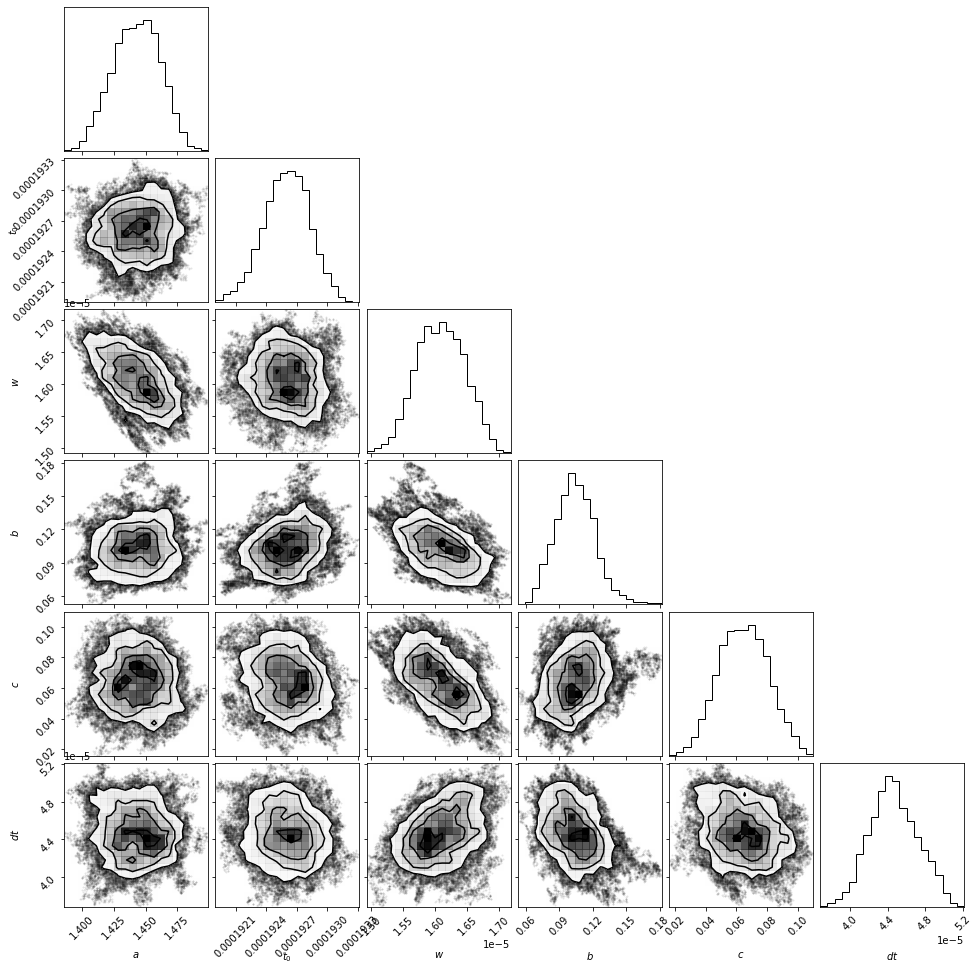

In [161]:
figure = corner.corner(samples.T,labels=par)

And the estimations for the parameters and the parameters errors are the mean and standard deviations of the distributions.

In [162]:
parr=['a','t0','w','b','c','dt']
for i in range(6):
    print('The stimation of '+str(parr[i])+' is '
          +str(np.mean(samples[i]))+' with an error of '+str(np.std(samples[i])))

The stimation of a is 1.4426256806766606 with an error of 0.018248851300726263
The stimation of t0 is 0.00019260007524953034 with an error of 2.2241000098695415e-07
The stimation of w is 1.6078909583878605e-05 with an error of 3.74234199878847e-07
The stimation of b is 0.10458742985758268 with an error of 0.01791397809699422
The stimation of c is 0.06460357226891601 with an error of 0.015861196110451548
The stimation of dt is 4.466868224757101e-05 with an error of 2.5304826418257633e-06


We can see that the error bars are larger than before and we can look at the obtained fit with the parameters from the MCMC and also the residuals.

In [163]:
ymcmc=triple_lorentzz(t,np.mean(ad),np.mean(t0d),np.mean(wd),
                      np.mean(bd),np.mean(cd),np.mean(dtd))

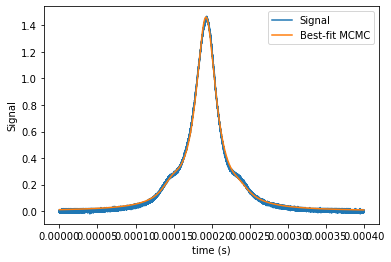

In [164]:
plt.plot(t,d,label='Signal')
plt.plot(t,ymcmc,label='Best-fit MCMC')
plt.ylabel('Signal')
plt.xlabel('time (s)')
plt.legend()
plt.show()

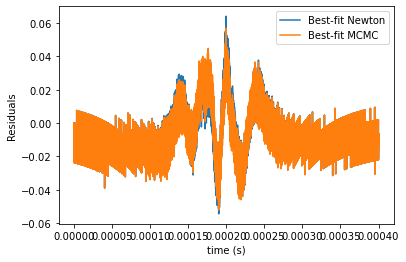

In [165]:
plt.plot(t,(d-y),label='Best-fit Newton')
plt.plot(t,(d-ymcmc),label='Best-fit MCMC')
plt.ylabel('Residuals')
plt.xlabel('time (s)')
plt.legend()
plt.show()

We can see that the residuals are almost the same, however the estimations in the errors is probably more robust for the MCMC case.

# h)

Finally, we can estimate the width $w$ in GHz. We know that the separation of the sidebans from the main peak is 9 GHz, since we have the separation in time $dt$ already computed, then we should scale using this proportion to obtain $w$ in GHz.  

In [166]:
np.mean(dtd),np.mean(wd),9/np.mean(dtd)

(4.466868224757101e-05, 1.6078909583878605e-05, 201483.4453839166)

In [167]:
np.mean(wd)*9/np.mean(dtd)

3.2396341009763385

Then the width of the cavity in GHz is 3.240 GHz